# Assignment #2: Stroke Prediction with Machine Learning
Tyler Hughes

October 17th, 2025

## Exploratory Analysis

In [28]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

train_df = pd.read_csv("../RawData/train.csv")

# train_df.drop('id', axis=1, inplace=True)

display(train_df.head())

print("\n--Training DataFrame Shape--")
display(train_df.shape)

print("\n--Column Data Types--")
print(train_df.dtypes)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Male,50.0,0,0,Yes,Private,Rural,88.10,29.1,formerly smoked,0
1,2,Female,52.0,0,0,Yes,Private,Rural,80.07,38.9,smokes,0
2,3,Female,26.0,0,0,No,Govt_job,Urban,89.11,23.3,smokes,0
3,4,Female,37.0,0,0,Yes,Private,Rural,81.36,36.1,never smoked,0
4,5,Male,59.0,0,0,Yes,Private,Rural,82.59,29.6,never smoked,1



--Training DataFrame Shape--


(12243, 12)


--Column Data Types--
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [29]:
stroke_counts = train_df['stroke'].value_counts()
print("Stroke Value Counts")
print(stroke_counts)
print("\n")

missing_values = train_df.isnull().sum()
print("Missing Values by Column")
print(train_df.isnull().sum())

Stroke Value Counts
stroke
0    11737
1      506
Name: count, dtype: int64


Missing Values by Column
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## Training of the Basic Logistic Regression model

In [30]:
X = train_df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = train_df['stroke']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)


--Basic Logistic Regression Metrics--
Accuracy:  0.9539
Precision: 0.4444
Recall:    0.0357
F1 Score:  0.0661

Classification Report:



,precision,recall,f1-score,support
0,0.9557,0.9979,0.9763,2337.0000
1,0.4444,0.0357,0.0661,112.0000
accuracy,0.9539,0.9539,0.9539,0.9539
macro avg,0.7001,0.5168,0.5212,2449.0000
weighted avg,0.9324,0.9539,0.9347,2449.0000


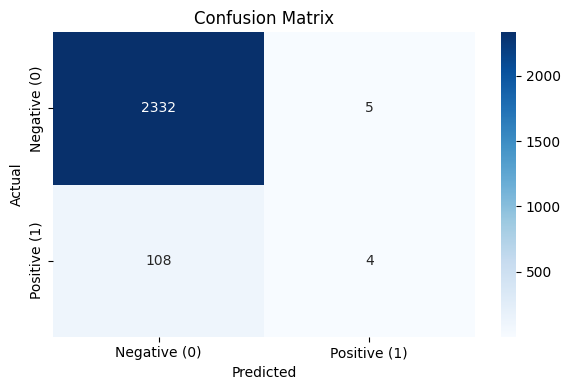

In [ ]:
y_pred = model.predict(X_test)

print("\n--Basic Logistic Regression Metrics--")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# nicely formatted classification report
print("\nClassification Report:\n")
display(report_df.round(4))

# blue confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Negative (0)', 'Positive (1)']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Training of the Logistic Regression CV model

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# Creating model with 5-fold cross-validation
model_cv = LogisticRegressionCV(cv=5, max_iter=1000, scoring='f1', class_weight='balanced')

# Fitting to training data
model_cv.fit(X_train, y_train)

LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=1000, scoring='f1')


--Logistic Regression CV Metrics--
Accuracy:  0.7922
Precision: 0.1572
Recall:    0.8125
F1 Score:  0.2634

Classification Report:



,precision,recall,f1-score,support
0,0.9888,0.7912,0.8790,2337.0000
1,0.1572,0.8125,0.2634,112.0000
accuracy,0.7922,0.7922,0.7922,0.7922
macro avg,0.5730,0.8018,0.5712,2449.0000
weighted avg,0.9507,0.7922,0.8509,2449.0000


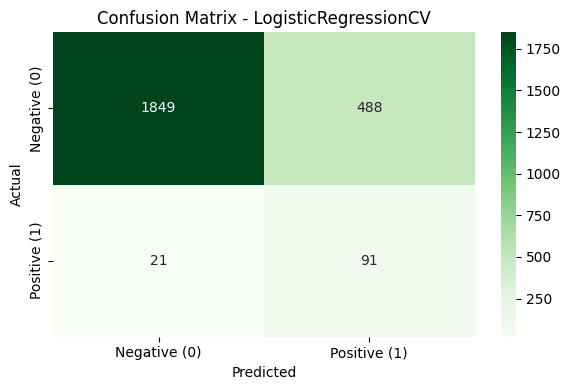

In [ ]:
y_pred_cv = model_cv.predict(X_test)

print("\n--Logistic Regression CV Metrics--")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_cv):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_cv):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_cv):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_cv):.4f}")

# --- Classification Report as a DataFrame ---
report_cv = classification_report(y_test, y_pred_cv, output_dict=True)
report_cv_df = pd.DataFrame(report_cv).transpose()

print("\nClassification Report:\n")
display(report_cv_df.round(4))  # nice formatting

# confusion matrix but green this time
cm_cv = confusion_matrix(y_test, y_pred_cv)
labels = ['Negative (0)', 'Positive (1)']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_cv, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LogisticRegressionCV')
plt.tight_layout()
plt.show()

In [ ]:
comparison_metrics = {
    'Model': ['LogisticRegression', 'LogisticRegressionCV'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_cv)
    ],
    'Precision': [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred_cv)
    ],
    'Recall': [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_cv)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_cv)
    ]
}

# Converting to DataFrame
comparison_df = pd.DataFrame(comparison_metrics)

# Rounding for display
comparison_df_rounded = comparison_df.copy()
comparison_df_rounded.iloc[:, 1:] = comparison_df.iloc[:, 1:].round(4)

print("--Model Performance Comparison--")
display(comparison_df_rounded)

--Model Performance Comparison--


,Model,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,0.9539,0.4444,0.0357,0.0661
1,LogisticRegressionCV,0.7922,0.1572,0.8125,0.2634


In [ ]:
# Radar chart using Plotly Graph Objects - one of my favorite graphs to use for comparisons
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
fig_radar = go.Figure()

# Adding traces for each model
for i in range(len(comparison_df)):
    fig_radar.add_trace(go.Scatterpolar(
        r=comparison_df.loc[i, metrics].values,
        theta=metrics,
        fill='toself',
        name=comparison_df.loc[i, 'Model']
    ))

fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    title='Model Performance Radar Chart',
    showlegend=True
)

fig_radar.show()



--K-Nearest Neighbors (KNN) Model Metrics--
Accuracy:  0.9518
Precision: 0.3636
Recall:    0.0714
F1 Score:  0.1194

Classification Report:



,precision,recall,f1-score,support
0,0.9571,0.9940,0.9752,2337.0000
1,0.3636,0.0714,0.1194,112.0000
accuracy,0.9518,0.9518,0.9518,0.9518
macro avg,0.6604,0.5327,0.5473,2449.0000
weighted avg,0.9300,0.9518,0.9361,2449.0000


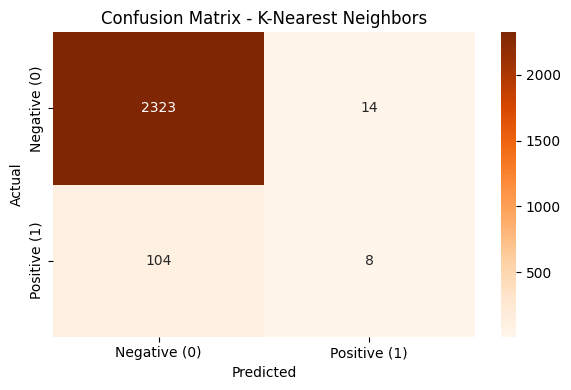

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

knn = KNeighborsClassifier(n_neighbors=5)

# Fitting on training data
knn.fit(X_train, y_train)

# Predicting on test data
y_pred_knn = knn.predict(X_test)

print("\n--K-Nearest Neighbors (KNN) Model Metrics--")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_knn):.4f}")

# Classification report as DataFrame for nice display
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_knn_df = pd.DataFrame(report_knn).transpose()

print("\nClassification Report:\n")
display(report_knn_df.round(4))

# Confusion matrix 
cm_knn = confusion_matrix(y_test, y_pred_knn)
labels = ['Negative (0)', 'Positive (1)']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.tight_layout()
plt.show()

### Loading and PreProcessing the Test Data

In [ ]:
test_df = pd.read_csv("../RawData/test.csv")

# Display structure
print("\n--Test DataFrame Shape--")
display(test_df.shape)
print("\n--Column Data Types--")
print(test_df.dtypes)

# Select same feature columns (exclude 'id')
X_test_raw = test_df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]

# One-hot encoding 
X_test_preprocessed = pd.get_dummies(X_test_raw, drop_first=True)

# fill missing with 0)
X_test_preprocessed = X_test_preprocessed.reindex(columns=X_train.columns, fill_value=0)

display(X_test_preprocessed.head())



--Test DataFrame Shape--


(3061, 11)


--Column Data Types--
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,40.0,0,0,94.65,34.7,False,0,True,False,True,False,False,True,False,True,False
1,31.0,0,0,97.24,29.0,False,0,True,False,True,False,False,True,False,False,False
2,50.0,0,0,95.52,31.4,True,0,True,False,True,False,False,False,False,False,True
3,34.0,0,0,80.03,19.8,False,0,True,False,True,False,False,True,True,False,False
4,52.0,0,0,206.59,39.4,False,0,True,False,False,False,False,False,True,False,False


In [ ]:
# using trained models to predict stroke probability using test data

# Logistic Regression
y_pred_test_lr = model.predict(X_test_preprocessed)

# Logistic Regression CV
y_pred_test_cv = model_cv.predict(X_test_preprocessed)

# KNN
y_pred_test_knn = knn.predict(X_test_preprocessed)


In [ ]:
# Combining my predictions into clean tables
pred_lr_df = pd.DataFrame({'id': test_df['id'], 'stroke': y_pred_test_lr})
pred_cv_df = pd.DataFrame({'id': test_df['id'], 'stroke': y_pred_test_cv})
pred_knn_df = pd.DataFrame({'id': test_df['id'], 'stroke': y_pred_test_knn})

# Display preview of each
print("\n--Logistic Regression Predictions--")
display(pred_lr_df.head())

print("\n--Logistic Regression CV Predictions--")
display(pred_cv_df.head())

print("\n--KNN Predictions--")
display(pred_knn_df.head())

# exporting to csv
pred_lr_df.to_csv("../Output/predictions_logistic.csv", index=False)
pred_cv_df.to_csv("../Output/predictions_logisticCV.csv", index=False)
pred_knn_df.to_csv("../Output/predictions_knn.csv", index=False)

print("✅ Predictions saved successfully to ../Output/")




--Logistic Regression Predictions--


,id,stroke
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0



--Logistic Regression CV Predictions--


,id,stroke
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1



--KNN Predictions--


,id,stroke
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


✅ Predictions saved successfully to ../Output/
